error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'absdiff'
> Overload resolution failed:
>  - absdiff() missing required argument 'src2' (pos 2)
>  - absdiff() missing required argument 'src2' (pos 2)


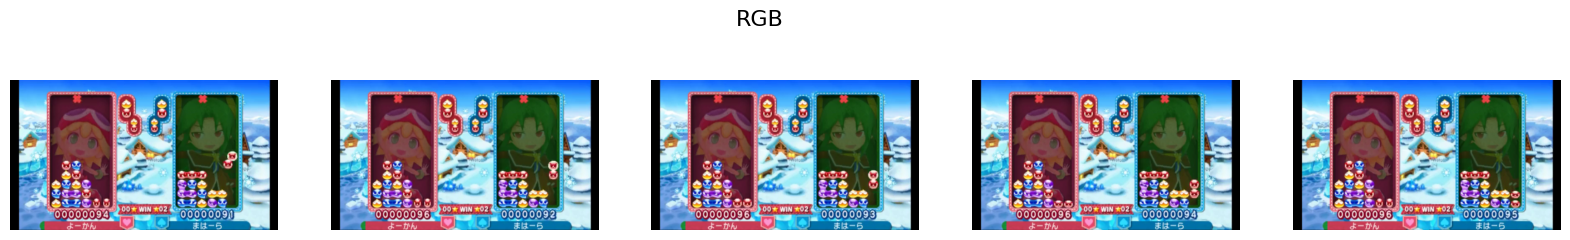

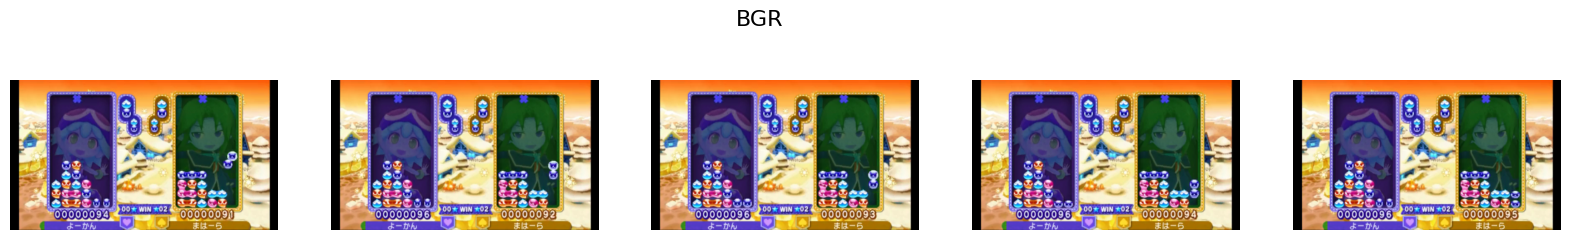

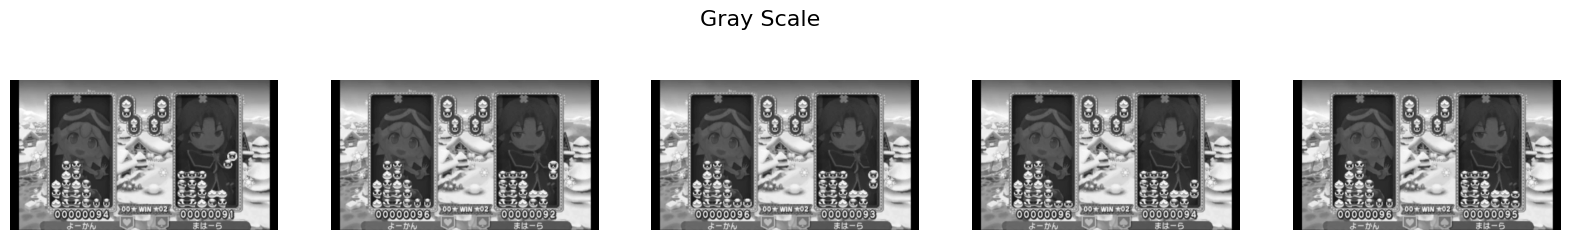

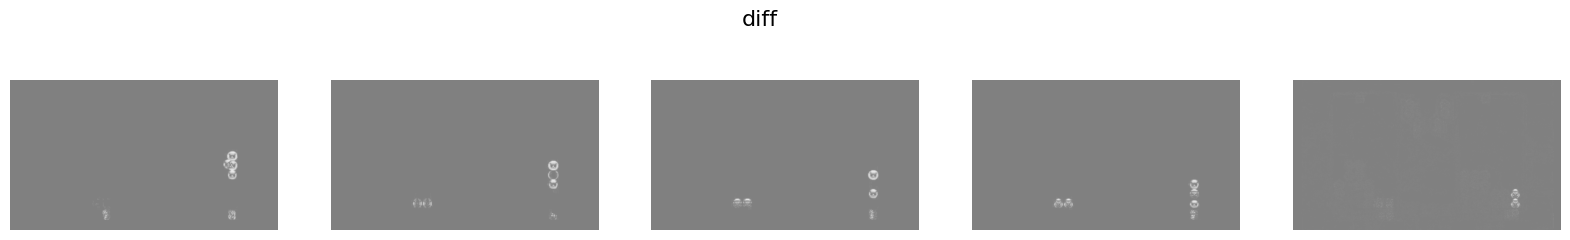

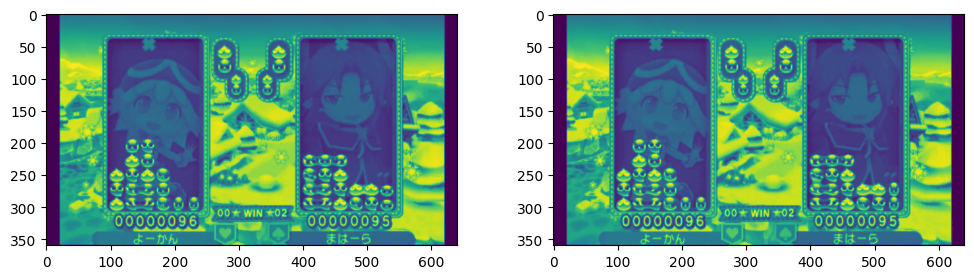

In [23]:
from os import major
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
# 動画の開始フレーム
frameIndex = 9005

# 動画読み込み
cap = cv2.VideoCapture("./resources/puyo_battle.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
sec = frame_count / fps

fps, frame_count, round(sec, 3), (h, w)

# 動画から画像を抽出
n_frames = int(51 * fps + 1)
n_frames
frames = []
while True:
    # generator にしたほうが使いやすい
    ret, frame = cap.read()
    if not ret:
        print("read error")
        break

    frames.append(frame)
    if len(frames) == n_frames:
        break

frame_st = 225
frame_ed = 230
frame_range = frames[frame_st:frame_ed]
# # context manager として扱えるようにし、releaseを意識しないようにしたほうがいい
# if cap.isOpened():
#     cap.release()

# fig: 描画領域全体
# axes: 個別の描画領域の座標
# figsize: 全体の描画領域のサイズ
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(frame_range, axes):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_frame)
    # 描画領域の目盛りを消す
    ax.axis("off")
fig.suptitle("RGB", fontsize=16)

# BGR出力
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(frame_range, axes):
    ax.imshow(frame)
    ax.axis("off")
fig.suptitle("BGR", fontsize=16)

# グレースケール出力
gray_frames = [cv2.cvtColor(f, cv2.COLOR_BGR2GRAY) for f in frames]
gray_frame_range = gray_frames[frame_st:frame_ed]
gray_frame_range2 = gray_frames[frame_st+1:frame_ed+ 1]
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for frame, ax in zip(gray_frame_range, axes):
    ax.imshow(frame, cmap="gray", vmin=0, vmax=255)
    ax.axis("off")
_ = fig.suptitle("Gray Scale", fontsize=16)

# 差分出力
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for bef, aft, ax in zip(gray_frame_range, gray_frame_range2, axes):
    diff_frame = cv2.absdiff(aft, bef)
    ax.imshow(diff_frame, cmap="gray", vmin=-255, vmax=255)
    ax.axis("off")

_ = fig.suptitle("diff", fontsize=16)

fig, axes = plt.subplots(1, 2, figsize=(12, 3))
target1 = gray_frames[229]
target2 = gray_frames[230]
axes[0].imshow(target1)
axes[1].imshow(target2)

th = 30
mask = cv2.absdiff(target1, target2)
mask[mask < th] = 0
mask[mask >= th] = 255
# plt.legend()
plt.show()

plt.imshow(mask)
plt.show()

# cv2.absdiff(aft, bef)と aft - befの違い